# ASSIGNMENT 3 - 061_Prembabu.C
## CNN MODEL FOR CLASSIFICATION OF FLOWERS


##  DOWNLOAD THE DATA SET


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/My Drive


/content/drive/My Drive


In [ ]:
!unzip '/content/drive/MyDrive/IBM /Flowers-Dataset.zip'


Archive:  /content/drive/MyDrive/IBM /Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
input_folder='/content/drive/MyDrive/flowers'

In [ ]:
splitfolders.ratio(input_folder,output='/content/drive/MyDrive/Flowersdataset',ratio=(.8,0,.2),group_prefix=None)


Copying files: 4317 files [00:45, 95.01 files/s] 


In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowersdataset/train",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 3452 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowersdataset/test",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 865 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## Create Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()

##  ADD LAYERS(CONVOLUTION, MAX POOLING, FLATTEN, DENSE, HIDDEN, OUTPUT LAYERS)


In [ ]:
#Adding Convolutional Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
#Adding Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Flatten Layer
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Hidden Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
#Output Layer
model.add(Dense(5,activation='softmax'))

## Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

144

## Fit the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
144/144 [==============================] - 30s 202ms/step - loss: 1.3854 - accuracy: 0.4537 - val_loss: 1.2067 - val_accuracy: 0.5260
Epoch 2/10
144/144 [==============================] - 27s 188ms/step - loss: 1.0692 - accuracy: 0.5698 - val_loss: 1.0787 - val_accuracy: 0.5838
Epoch 3/10
144/144 [==============================] - 29s 199ms/step - loss: 1.0026 - accuracy: 0.6031 - val_loss: 1.0369 - val_accuracy: 0.6092
Epoch 4/10
144/144 [==============================] - 27s 185ms/step - loss: 0.9129 - accuracy: 0.6382 - val_loss: 1.0422 - val_accuracy: 0.6046
Epoch 5/10
144/144 [==============================] - 27s 191ms/step - loss: 0.8601 - accuracy: 0.6692 - val_loss: 0.9987 - val_accuracy: 0.6197
Epoch 6/10
144/144 [==============================] - 28s 194ms/step - loss: 0.8128 - accuracy: 0.6889 - val_loss: 1.0702 - val_accuracy: 0.6092
Epoch 7/10
144/144 [==============================] - 27s 189ms/step - loss: 0.7655 - accuracy: 0.7051 - val_loss: 1.0345 - val_ac

## Save the model

In [ ]:
model.save('flowers.h5')

## Test the model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

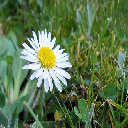

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/Flowersdataset/test/daisy/3379332157_04724f6480.jpg",target_size=(128,128))
img

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/Flowersdataset/test/daisy/3379332157_04724f6480.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 0s 100ms/step


'daisy'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

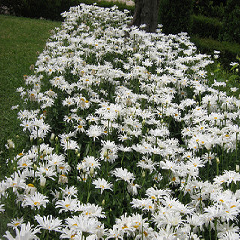

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/Flowersdataset/test/daisy/512477177_d9004cbcf1_n.jpg",target_size=(240,240))
img